In [ ]:
# default_exp data

# Dataset Management
> Some convenience functions for getting data to play with

These are some datasets I used while making and testing all this. This code should make it fairly easy to change between them. Hopefully the examples here are enough that you could adapt one to any other dataset you want to try.

In [24]:
#export 
from PIL import Image
import numpy as np
def tensor_to_image(t):
    return Image.fromarray(np.array(((t.detach().cpu().squeeze().permute(1, 2, 0)+1)/2).clip(0, 1)*255).astype(np.uint8))

In [35]:
#export
from datasets import load_dataset
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader

class CelebADataset(Dataset):
    def __init__(self, img_size=128):
        self.dataset = load_dataset('huggan/CelebA-faces')['train']
        self.preprocess = T.Compose([T.ToTensor(),T.Resize(img_size), T.CenterCrop(img_size)])
    def __len__(self):
        return len(self.dataset)
    def __getitem__(self, idx):
        x = self.dataset[idx]
        return (self.preprocess(x['image']), 'A photo of a face')
        
def get_celebA_dl(img_size=128, batch_size=32):
    dataset = CelebADataset(img_size)
    dl = DataLoader(dataset, batch_size=batch_size)
    return dl

Using custom data configuration huggan--CelebA-faces-8a807f0d7d4912ca
Reusing dataset parquet (/root/.cache/huggingface/datasets/parquet/huggan--CelebA-faces-8a807f0d7d4912ca/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901)


  0%|          | 0/1 [00:00<?, ?it/s]

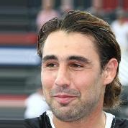

In [36]:
#slow_test
dl = get_celebA_dl()
images, texts = next(iter(dl))
tensor_to_image(images[0]*2-1)

In [43]:
#export
import webdataset as wds
import torch
def get_cc12m_dl(img_size=128, batch_size=32,url=None, num_workers=8):
    if url == None:
        url = 'https://huggingface.co/datasets/laion/conceptual-captions-12m-webdataset/resolve/main/data/{00000..01200}.tar'
    preproc = T.Compose([T.ToTensor(),T.Resize(img_size), T.CenterCrop(img_size)])
    dataset = (
          wds.WebDataset(url)
          .shuffle(1000)
          .decode("pil")
          .rename(image="jpg;png", text="txt")
          .map_dict(image=preproc)
          .to_tuple("image", "text")
    )
    dl = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)
    return dl

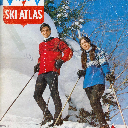

In [44]:
#slow_test
dl = get_cc12m_dl()
images, texts = next(iter(dl))
tensor_to_image(images[0]*2-1)